# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane were the most thoroughly studied drugs with the most time points out of any of the 10 drugs used – over 200. Propriva had the least amount of timepoints – under 150. 

We can observe with the boxplot that Capomulin and Ramicane were more effective than Infubinol and Ceftamin in treating tumors in mice. While the final tumor volumes (mm3) for mice on Infubinol and Ceftamin measured just above 60mm3, the volumes in mice treated with Capomulin and Ramicane measured around 35 to 38 mm3.

There is an almost perfect positive correlation between heavier mice and the volume of their tumors for mice on Capomulin, with an r-squared value of 0.95. However, to see the effect of Capomulin, I ran a line plot from Mouse j246. Over the course of 35 timepoints, Mouse j246’s tumor volumes decreased from 45mm3 to 39mm3. I strongly believe had we continued treatment, all tumors in Mouse j246 would have been eliminate
d.
I highly recommend that Pymaceuticals, Inc begin the next stages of testing Capomulin to eliminate squamous cell carcinoma (SC).
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the datasets into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

In [2]:
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Display the number of unique mice IDs in the data.
df["Mouse ID"].nunique()

249

In [4]:
# Check for any duplicate mouse IDs and time points
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10) 

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [5]:
# Create a new DataFrame with duplicate data removed / dropped
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)

In [6]:
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Check the number of mice in the clean DataFrame
df2["Mouse ID"].nunique()

248

In [8]:
df2.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


## Summary Statistics

In [9]:
# Create a summary statistics DataFrame
# A row for each drug regimen. These regimen names should be contained in the index column.
# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_vol_mean = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_vol_median = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_vol_var = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_vol_std = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_vol_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame
data = {
    "Tumor Average": tumor_vol_mean,
    "Tumor Median": tumor_vol_median,
    "Tumor Variance": tumor_vol_var,
    "Tumor Standard Deviation": tumor_vol_std,
    "Tumor SEM": tumor_vol_sem
}

ss_df = pd.DataFrame(data).reset_index()
ss_df

,Drug Regimen,Tumor Average,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [10]:
ss_df.describe()

,Tumor Average,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.975982,49.902123,47.858440,6.821103,0.502785
std,5.621289,4.705415,16.008423,1.216096,0.103473
min,40.216745,40.673236,23.486704,4.846308,0.320955
25%,52.388490,50.778739,40.249804,6.342952,0.475424
50%,53.060651,51.819532,46.192684,6.794337,0.530365
75%,54.183257,52.396036,60.738703,7.793357,0.579276
max,55.235638,53.698743,68.553577,8.279709,0.603860


## Bar and Pie Charts

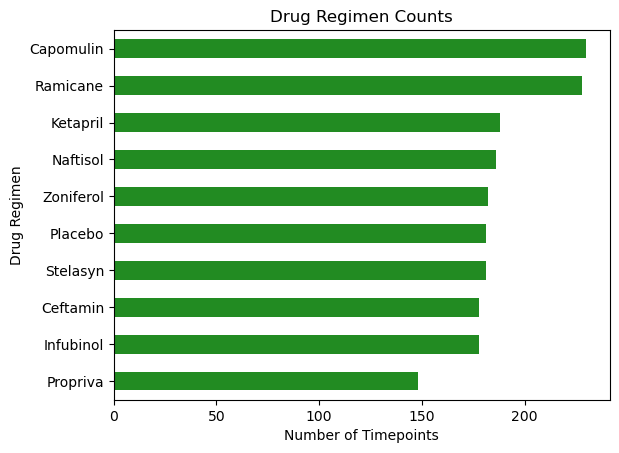

In [11]:
# Generate two bar charts
# Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.

# Create the first bar chart with the Pandas DataFrame.plot() method.

df2["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="forestgreen")
plt.ylabel("Drug Regimen")
plt.xlabel("Number of Timepoints")
plt.show()

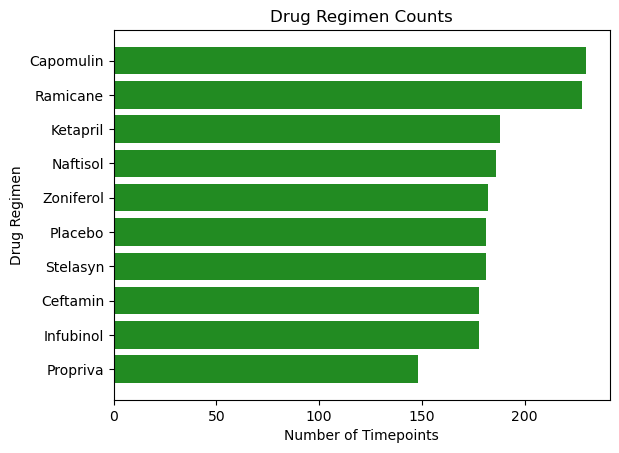

In [12]:
# Create the second bar chart with Matplotlib's pyplot methods.
data = df2["Drug Regimen"].value_counts().sort_values()
plt.barh(data.index.values,data.values,color="forestgreen")
plt.xlabel("Number of Timepoints")
plt.ylabel("Drug Regimen")
plt.title("Drug Regimen Counts")
plt.show()

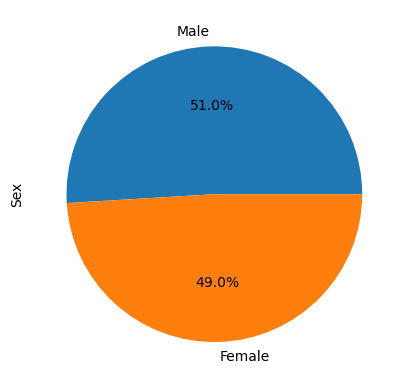

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = df2["Sex"].value_counts()
data.plot(kind="pie",autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

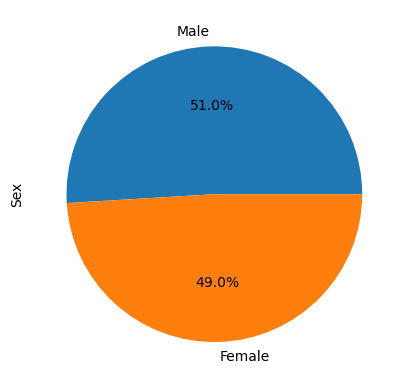

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = df2["Sex"].value_counts()
plt.pie(data.values,labels=data.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = df2.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_tumor.merge(df2, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
merged_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,32.903226,54.968606,1.681452,12.697581,26.116935
std,15.495811,12.671479,1.328350,7.224093,3.704472
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,20.000000,45.875867,1.000000,6.000000,25.000000
50%,45.000000,55.793278,1.000000,13.000000,27.000000
75%,45.000000,65.053624,3.000000,19.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [17]:
# Put treatments into a list for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_final = merged_df.loc[merged_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol_final)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_final.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile # iqr means interquartile range
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = tumor_vol_final.loc[(tumor_vol_final < lower_bound) | (tumor_vol_final > upper_bound)]
    print(f"(Potential outliers in {drug}: {outliers})")

(Potential outliers in Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Potential outliers in Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Potential outliers in Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Potential outliers in Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64))


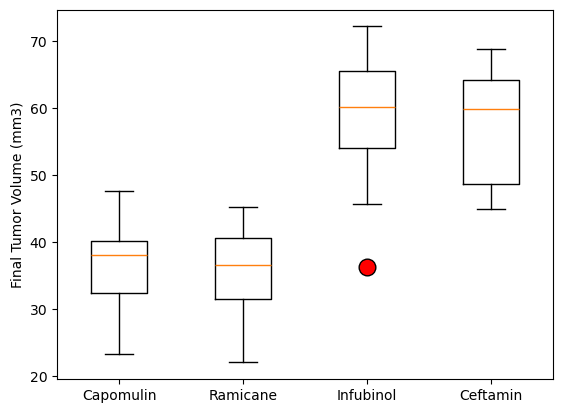

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_data, labels = drugs, flierprops=out)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

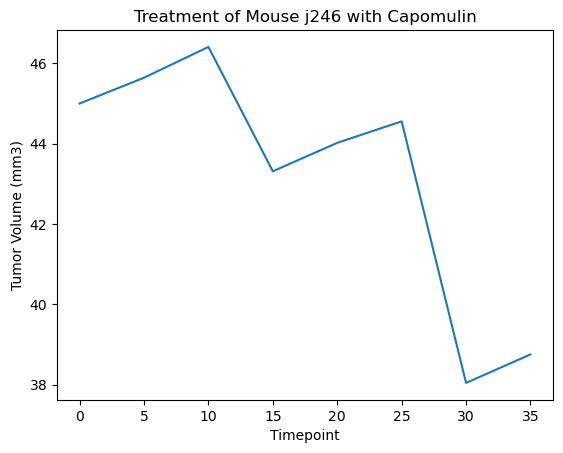

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]
cap_mouse_j246 = capomulin_df.loc[capomulin_df["Mouse ID"] == "j246"]

plt.plot(cap_mouse_j246['Timepoint'],cap_mouse_j246['Tumor Volume (mm3)'])

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Treatment of Mouse j246 with Capomulin")

plt.show()

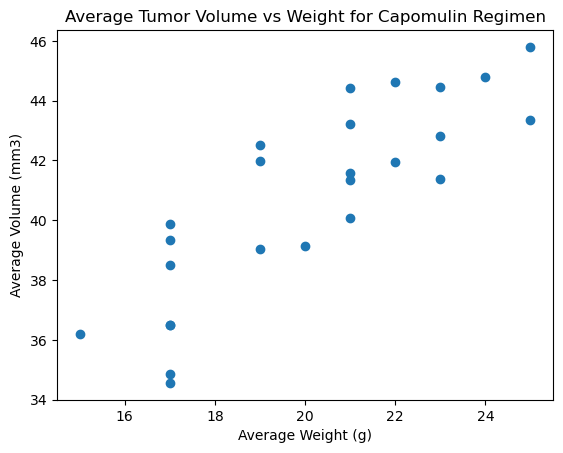

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df2 = df2.loc[df2["Drug Regimen"] == "Capomulin"]
avg_capomulin = capomulin_df2.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"])
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Volume (mm3)")
plt.title("Average Tumor Volume vs Weight for Capomulin Regimen")
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [22]:
data = df2.loc[df2["Drug Regimen"] == "Capomulin"]

df3 = data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

In [23]:
correlations = df3.corr(numeric_only = True)
correlations

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


The r-squared is: 0.7088568047708723


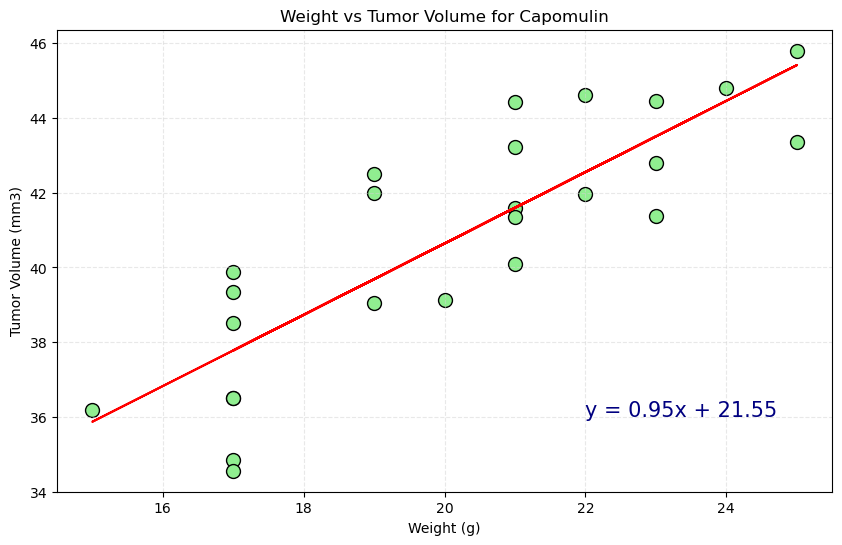

In [24]:
x_values = df3["Weight (g)"]
y_values = df3["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.figure(figsize=(10,6))

plt.scatter(x_values, y_values, facecolor="lightgreen", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.grid(color="lightgrey", linestyle= "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="navy")

print(f"The r-squared is: {rvalue**2}")
plt.show()